In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Set the path to your dataset within Google Drive
dataset_path = '/content/drive/MyDrive/BreastCancerDataset/Dataset2/FNA'
test_path = '/content/drive/MyDrive/BreastCancerDataset/Dataset2/test'

Mounted at /content/drive


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [6]:
# Image parameters
img_size = (128, 128)
batch_size = 32

# Data augmentation and preprocessing setup
datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values
    validation_split=0.2  # 20% of data for validation
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 1380 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


In [7]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 301s 6s/step - accuracy: 0.6812 - loss: 0.5616 - val_accuracy: 0.7529 - val_loss: 0.6225
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8954 - loss: 0.3090 - val_accuracy: 0.7471 - val_loss: 0.5674
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8943 - loss: 0.2852 - val_accuracy: 0.6076 - val_loss: 0.9906
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8995 - loss: 0.2960 - val_accuracy: 0.7180 - val_loss: 0.6098
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9172 - loss: 0.2335 - val_accuracy: 0.6802 - val_loss: 0.6725
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9083 - loss: 0.2628 - val_accuracy: 0.8198 - val_loss: 0.5097
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9275 - loss: 0.1974 - val_accuracy: 0.7151 - val_loss: 0.6347
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9252 - loss: 0.2209 - val_accuracy: 0.6483 - val_loss: 0.8460
Ep

In [25]:
model.save_weights(f"/content/drive/MyDrive/BreastCancerDataset/Dataset2/best_model_weights_epoch{best_epoch}.weights.h5")

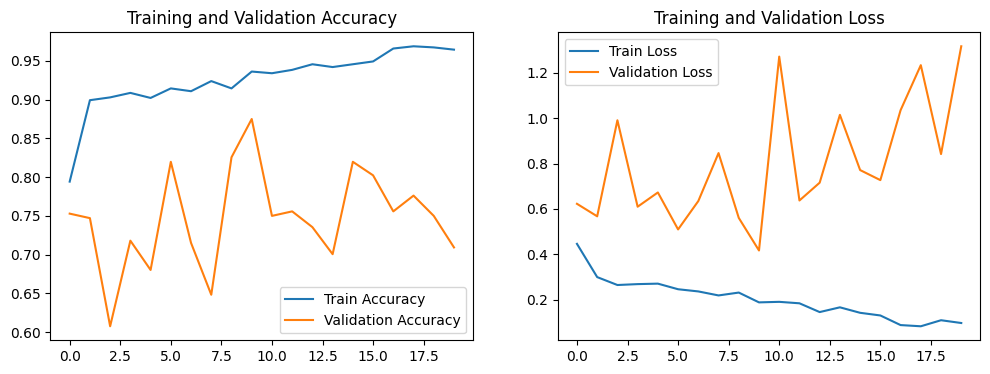

In [9]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [34]:
# Load the best weights based on validation accuracy
model.load_weights(f"/content/drive/MyDrive/BreastCancerDataset/Dataset2/best_model_weights_epoch{best_epoch}.weights.h5")

# Prepare test data for prediction
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/BreastCancerDataset/Dataset2/test',  # Directory containing the test folder
    target_size=img_size,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# Predict
predictions = model.predict(test_data)
predicted_labels = ['Malignant' if pred > 0.5 else 'Benign' for pred in predictions]

# Display predictions
for i, file_name in enumerate(test_data.filenames):
    print(f"{file_name}: {predicted_labels[i]}")


Found 14 images belonging to 1 classes.
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
unknown/eight.png: Malignant
unknown/eleven.png: Malignant
unknown/five.png: Malignant
unknown/four.png: Malignant
unknown/fourteen.png: Malignant
unknown/nine.png: Malignant
unknown/one.png: Benign
unknown/seven.png: Malignant
unknown/six.png: Benign
unknown/ten.png: Malignant
unknown/thirteen.png: Malignant
unknown/three.png: Malignant
unknown/twelve.png: Malignant
unknown/two.png: Benign


In [35]:
# Save the trained model
model.save('/content/drive/MyDrive/BreastCancerDataset/breast_cancer_model.h5')
